In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb_ori = pd.read_csv(airbnb_url) #original data
airbnb = airbnb_ori.copy() #working with copy of original data in case something goes wrong !
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
airbnb.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# OPTIONAL - SEPARATING DATA 
cat_df = airbnb.select_dtypes(include=['object']) #declare 2 DF
num_df = airbnb.select_dtypes(exclude=['object'])
def printColumnTypes(non_numeric_df, numeric_df): #function  to separate numeric and non-numeric columns in two DataFrame 
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

Numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [11]:
colsToDrop = ['id','host_name','last_review']
airbnb.drop(colsToDrop, axis=1, inplace=True)
#inplace=True means the data is directly updated, by default it is False so only a view that needs to be saved for further using 


KeyError: "['id' 'host_name' 'last_review'] not found in axis"

In [13]:
# remove rows with missing values in price
airbnb['price'].dropna(inplace=True)
airbnb.isna().sum() # view number of NA values par column 

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# imputing price with mean
price_mean_value = round(airbnb['price'].mean(), 2) 
airbnb['price'].fillna(price_mean_value, inplace=True) #fill missing data by price_mean_value

In [15]:
# imputing price with median
price_median_value = round(airbnb['price'].median(), 2)
airbnb['price'].fillna(price_median_value, inplace=True) #idem but with median

In [24]:
airbnb['price'].replace('None',np.nan,inplace=True)

In [25]:
airbnb['price'].isna().sum()

11

In [28]:
#APPARTE ON FFILL AND BFFIL
import pandas as pd
  
# Creating a dataframe with "na" values.
  
df = pd.DataFrame({"A":[None, 1, 2, 3, None, None], 
                   "B":[11, 5, None, None, None, 8],
                   "C":[None, 5, 10, 11, None, 8]})
  
# Printing the dataframe
df

,A,B,C
0,NaN,11.0,NaN
1,1.0,5.0,5.0
2,2.0,NaN,10.0
3,3.0,NaN,11.0
4,NaN,NaN,NaN
5,NaN,8.0,8.0


In [27]:
df.ffill()

,A,B,C
0,NaN,11.0,NaN
1,1.0,5.0,5.0
2,2.0,5.0,10.0
3,3.0,5.0,11.0
4,3.0,5.0,11.0
5,3.0,8.0,8.0


In [30]:
#END OF APPARTE
df.bfill()

,A,B,C
0,1.0,11.0,5.0
1,1.0,5.0,5.0
2,2.0,8.0,10.0
3,3.0,8.0,11.0
4,NaN,8.0,8.0
5,NaN,8.0,8.0


In [34]:
## ONE MORE MODEL FOR FILLING VALUES  - More sophisticated, close to Machine Learning

# imputing with SimpleImputor from the sklearn library

from sklearn.impute import SimpleImputer
# define the imputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median
airbnb[['price']] = imr.fit_transform(airbnb[['price']])

In [35]:
#Finding any outliers by checking the describe data
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.755053,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.143242,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:>

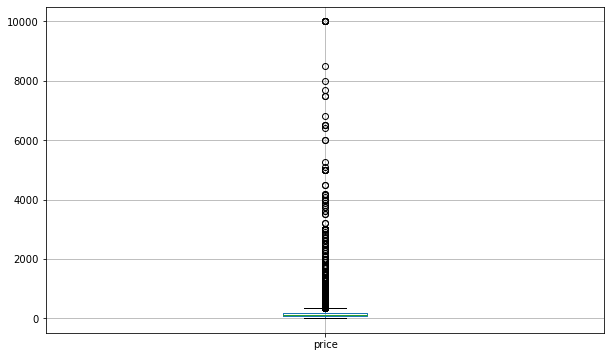

In [36]:
plt.figure(figsize=(10, 6))
airbnb.boxplot(column=['price']) #see the distribution of our points from Price 
#here surely outliers from 8000 to 10000

<AxesSubplot:>

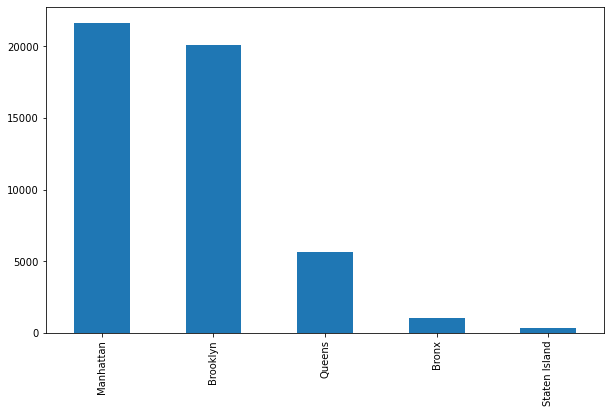

In [37]:
plt.figure(figsize=(10, 6))
airbnb['neighbourhood_group'].value_counts().plot.bar() 
# Statend Island looks like an outlier in this chart 

In [38]:
#check if there are any duplicates
airbnb.duplicated().any()

False

In [39]:
#drop duplicates if there are any
airbnb.drop_duplicates()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,6,2
